In [15]:
! pip install matplotlib

     ------------------------------------ 123.4/123.4 kB 402.8 kB/s eta 0:00:00
  Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl (11.3 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
     -------------------------------------- 949.2/949.2 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------ 106.4/106.4 kB 686.8 kB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 2.7 MB/s eta 0:00:00
     ------------------------------------- 176.8/176.8 kB 11.1 MB/s eta 0:00:00
  Using cached cffi-2.0.0-cp311-cp311-win_amd64.w


[notice] A new release of pip available: 22.2.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.1/8.1 MB 5.2 MB/s eta 0:00:00
     -------------------------------------- 225.2/225.2 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 8.1 MB/s eta 0:00:00
     -------------------------------------- 73.8/73.8 kB 676.6 kB/s eta 0:00:00
     -------------------------------------- 113.9/113.9 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Step 1 :  Data Collection from Yahoo finance 

In [17]:
now = datetime.now()
start = datetime(now.year-10 , now.month , now.day)
end = now
ticker = 'AAPL'
df = yf.download('AAPL' , start , end )   # ticker is the stock name , start and end are dates between which data has to extracted

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7300\263966424.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL' , start , end )   # ticker is the stock name , start and end are dates between which data has to extracted
[*********************100%***********************]  1 of 1 completed


In [18]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-11-02,27.232241,27.272691,26.879422,27.146846,128813200
2015-11-03,27.544611,27.751358,27.124374,27.144600,182076000
2015-11-04,27.416513,27.825514,27.331118,27.670453,179544400
2015-11-05,27.290134,27.689602,27.123126,27.500024,158210800
2015-11-06,27.321726,27.490991,27.222425,27.333011,132169200
...,...,...,...,...,...
2025-10-27,268.809998,269.119995,264.649994,264.880005,44888200
2025-10-28,269.000000,269.890015,268.149994,268.989990,41534800


In [19]:
df.columns = df.columns.droplevel(1)


# Step 2 : Data Exploration and  Visualization

In [20]:
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-11-02,27.232241,27.272691,26.879422,27.146846,128813200
2015-11-03,27.544611,27.751358,27.124374,27.144600,182076000
2015-11-04,27.416513,27.825514,27.331118,27.670453,179544400
2015-11-05,27.290134,27.689602,27.123126,27.500024,158210800
2015-11-06,27.321726,27.490991,27.222425,27.333011,132169200
...,...,...,...,...,...
2025-10-27,268.809998,269.119995,264.649994,264.880005,44888200
2025-10-28,269.000000,269.890015,268.149994,268.989990,41534800
2025-10-29,269.700012,271.410004,267.109985,269.279999,51086700


In [21]:
df.describe()   # basic overview of the data 

Price,Close,High,Low,Open,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,110.316352,111.415001,109.101794,110.211976,1.036797e+08
std,71.309232,71.995063,70.534356,71.235062,5.834331e+07
min,20.624050,20.927684,20.425436,20.546434,2.323470e+07
25%,40.842838,41.121763,40.558854,40.869608,6.386875e+07
50%,115.772881,117.212500,113.819179,115.875170,9.032920e+07
75%,169.653267,171.390225,168.406517,169.522165,1.270812e+08
max,271.399994,277.320007,269.160004,276.989990,5.334788e+08


In [22]:
df.isna().sum()  # check for the null values

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

* NO null values 
* if null values use 'dropna()' to drop of null values 

In [23]:
df.shape

(2515, 5)

In [24]:
type(df)

pandas.core.frame.DataFrame

In [25]:
df.dtypes

Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [26]:
df =df.reset_index()

In [27]:
df

Price,Date,Close,High,Low,Open,Volume
0,2015-11-02,27.232241,27.272691,26.879422,27.146846,128813200
1,2015-11-03,27.544611,27.751358,27.124374,27.144600,182076000
2,2015-11-04,27.416513,27.825514,27.331118,27.670453,179544400
3,2015-11-05,27.290134,27.689602,27.123126,27.500024,158210800
4,2015-11-06,27.321726,27.490991,27.222425,27.333011,132169200
...,...,...,...,...,...,...
2510,2025-10-27,268.809998,269.119995,264.649994,264.880005,44888200
2511,2025-10-28,269.000000,269.890015,268.149994,268.989990,41534800
2512,2025-10-29,269.700012,271.410004,267.109985,269.279999,51086700
2513,2025-10-30,271.399994,274.140015,268.480011,271.989990,69886500


* index changes from data column to index column

Text(0, 0.5, 'price closing')

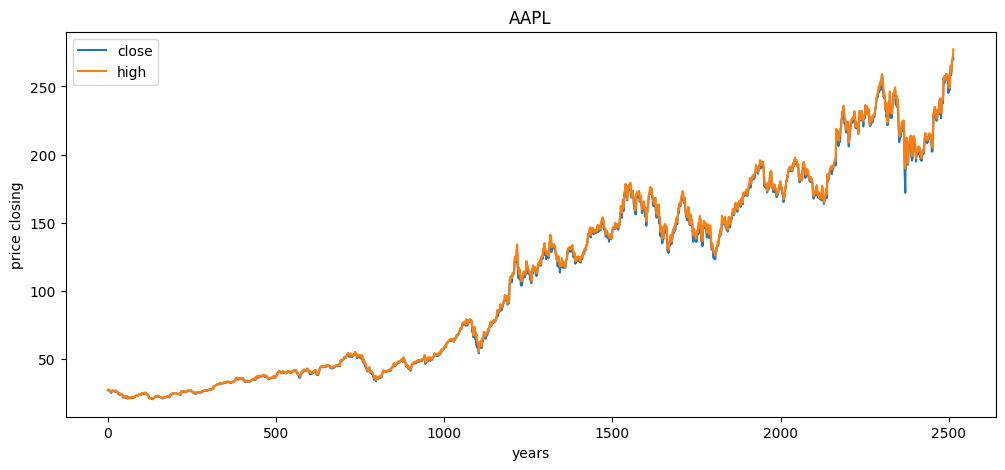

In [28]:
plt.figure(figsize=(12,5))
plt.plot(df.Close,label='close')
plt.plot(df.High,label = 'high')
plt.legend()
plt.title(ticker)
plt.xlabel('years')
plt.ylabel('price closing')

* the stock prediction shows very noisy ups and downs 
* to know about the stock is uprising or downfalling we use " MOVING AVERAGE "
* THAT  helps to predict the growth or downfall of the stock

# Step 3 : Feature Engineering

In [29]:
# # calculating movieng average (size = 5) example

# nums = 10,20,30,40,50,60,70,80,90
# moving average ==> null , null , null , null , avg([:50]) , avg([10:0]).....

In [30]:
nums = 10,20,30,40,50,60,70,80,90 
window_size = 5

for i in range(len(nums)+1):
    print(nums[i-5:i])
    print("avg :", np.average(nums[i-5:i]))

()
avg : nan
()
avg : nan
()
avg : nan
()
avg : nan
()
avg : nan
(10, 20, 30, 40, 50)
avg : 30.0
(20, 30, 40, 50, 60)
avg : 40.0
(30, 40, 50, 60, 70)
avg : 50.0
(40, 50, 60, 70, 80)
avg : 60.0
(50, 60, 70, 80, 90)
avg : 70.0


c:\Users\ADMIN\OneDrive\Desktop\stock-prediction-portal\env\Lib\site-packages\numpy\lib\_function_base_impl.py:571: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\ADMIN\OneDrive\Desktop\stock-prediction-portal\env\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


* in reality they take windowsize larger like 100 or  200
* we use rolling() for moving avg calculation

In [31]:
df

Price,Date,Close,High,Low,Open,Volume
0,2015-11-02,27.232241,27.272691,26.879422,27.146846,128813200
1,2015-11-03,27.544611,27.751358,27.124374,27.144600,182076000
2,2015-11-04,27.416513,27.825514,27.331118,27.670453,179544400
3,2015-11-05,27.290134,27.689602,27.123126,27.500024,158210800
4,2015-11-06,27.321726,27.490991,27.222425,27.333011,132169200
...,...,...,...,...,...,...
2510,2025-10-27,268.809998,269.119995,264.649994,264.880005,44888200
2511,2025-10-28,269.000000,269.890015,268.149994,268.989990,41534800
2512,2025-10-29,269.700012,271.410004,267.109985,269.279999,51086700
2513,2025-10-30,271.399994,274.140015,268.480011,271.989990,69886500


In [32]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
0,2015-11-02,27.232241,27.272691,26.879422,27.146846,128813200,NaN
1,2015-11-03,27.544611,27.751358,27.124374,27.144600,182076000,NaN
2,2015-11-04,27.416513,27.825514,27.331118,27.670453,179544400,NaN
3,2015-11-05,27.290134,27.689602,27.123126,27.500024,158210800,NaN
4,2015-11-06,27.321726,27.490991,27.222425,27.333011,132169200,NaN


*  another column got added : Moving AVG

In [33]:
df.head(105)

Price,Date,Close,High,Low,Open,Volume,MA_100
0,2015-11-02,27.232241,27.272691,26.879422,27.146846,128813200,NaN
1,2015-11-03,27.544611,27.751358,27.124374,27.144600,182076000,NaN
2,2015-11-04,27.416513,27.825514,27.331118,27.670453,179544400,NaN
3,2015-11-05,27.290134,27.689602,27.123126,27.500024,158210800,NaN
4,2015-11-06,27.321726,27.490991,27.222425,27.333011,132169200,NaN
...,...,...,...,...,...,...,...
100,2016-03-29,24.433903,24.458863,23.798548,23.800818,124760400,23.876657
101,2016-03-30,24.860497,25.055641,24.642661,24.654007,182404400,23.849816
102,2016-03-31,24.731150,24.937641,24.706189,24.896796,103553600,23.822962
103,2016-04-01,24.958063,24.960333,24.551890,24.683500,103496000,23.799642


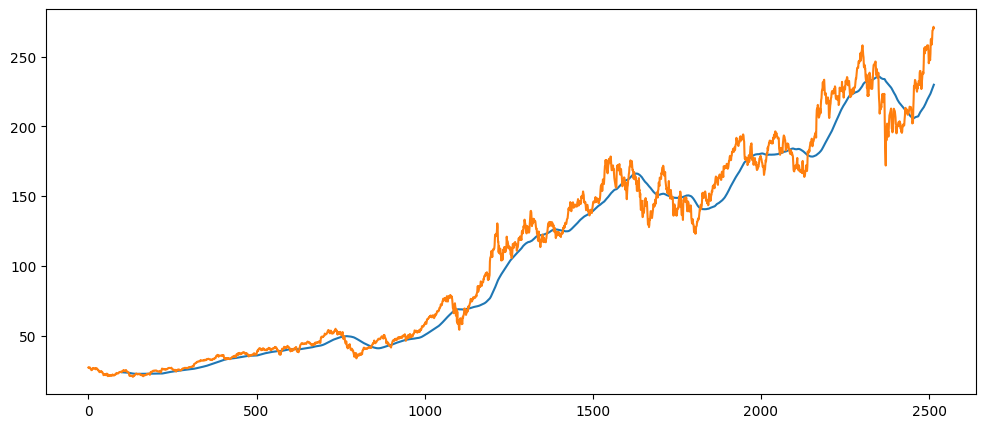

In [34]:
plt.figure(figsize=(12,5))

plt.plot(df.MA_100)
plt.plot(df.Close)

### * for Closing price calculate percentage change for each row 

In [35]:
df['Percentage_changed'] = df.Close.pct_change()


In [36]:
df[['Close', 'Percentage_changed']]

Price,Close,Percentage_changed
0,27.232241,NaN
1,27.544611,0.011471
2,27.416513,-0.004651
3,27.290134,-0.004610
4,27.321726,0.001158
...,...,...
2510,268.809998,0.022791
2511,269.000000,0.000707
2512,269.700012,0.002602
2513,271.399994,0.006303


# Step 4 : Data Preprocessing 

In [133]:
! pip install keras

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.17.0-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached ml_dtypes-0.5.3-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 2.0 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.5 MB 1.9 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 1.9 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.5 MB 2.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.5 MB 2.2 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.5 MB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 1.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.6

In [171]:
! python --version

Python 3.12.4


In [37]:
df.shape

(2515, 8)

## The MinMaxScaler scales features to a specified range (default: [0, 1]). 
*It is useful for algorithms like neural networks that expect normalized inputs.

In [38]:
# splitting data into trainging and testign

data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

In [39]:
data_training

,Close
0,27.232241
1,27.544611
2,27.416513
3,27.290134
4,27.321726
...,...
1755,144.981430
1756,147.127533
1757,149.972595
1758,147.029114


In [40]:
data_testing

,Close
1760,153.319794
1761,150.957062
1762,148.308868
1763,142.776230
1764,136.721786
...,...
2510,268.809998
2511,269.000000
2512,269.700012
2513,271.399994


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))


In [42]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.04187194],
       [0.04385123],
       [0.04303956],
       ...,
       [0.81960025],
       [0.80094926],
       [0.77256651]], shape=(1760, 1))

In [43]:
type(data_training_array)

numpy.ndarray

In [44]:
data_training_array.shape

(1760, 1)

# Step 5  :  Sequence creation 

* for LSTM model we need to send sequence of data that why we create this

In [53]:
x_train = []
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    

In [54]:
y_train = np.array(y_train)

In [55]:
y_train

array([0.02414064, 0.02684369, 0.0260241 , ..., 0.81960025, 0.80094926,
       0.77256651], shape=(1660,))

In [56]:
x_train = np.array(x_train)
x_train

array([[[0.04187194],
        [0.04385123],
        [0.04303956],
        ...,
        [0.021912  ],
        [0.02125064],
        [0.02056046]],

       [[0.04385123],
        [0.04303956],
        [0.04223878],
        ...,
        [0.02125064],
        [0.02056046],
        [0.02414064]],

       [[0.04303956],
        [0.04223878],
        [0.04243895],
        ...,
        [0.02056046],
        [0.02414064],
        [0.02684369]],

       ...,

       [[0.81124325],
        [0.77492669],
        [0.77966099],
        ...,
        [0.76377114],
        [0.78797438],
        [0.80157288]],

       [[0.77492669],
        [0.77966099],
        [0.79566995],
        ...,
        [0.78797438],
        [0.80157288],
        [0.81960025]],

       [[0.77966099],
        [0.79566995],
        [0.79099812],
        ...,
        [0.80157288],
        [0.81960025],
        [0.80094926]]], shape=(1660, 100, 1))

# step 6 : BUilding Machine learning model

In [2]:
! pip install keras


[notice] A new release of pip available: 22.2.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip list | findstr tensorflow

tensorflow_cpu                    2.20.0
Note: you may need to restart the kernel to use updated packages.


Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0


In [48]:
import tensorflow as tf

In [49]:
from sklearn.preprocessing import MinMaxScaler


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Input


In [51]:
model = Sequential()

model.add(Input(shape= (100,1)))
model.add(LSTM(units=128 , activation = 'relu', return_sequences=True))
model.add(LSTM(units=4))
model.add(Dense(25))
model.add(Dense(1))

# step 7 : model training

In [57]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - loss: 0.0560
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 0.0010
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 8.1125e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - loss: 7.1974e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - loss: 7.6600e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 6.9489e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 6.5295e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 6.8435e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - loss: 7.0301e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - loss: 6.0091e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - loss: 5.9151e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 5.3346e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - loss: 5.9363e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 5.6613e-04
Ep

In [58]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 4)              │         2,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │           125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,519 (806.72 KB)

 Trainable params: 68,839 (268.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 137,680 (537.82 KB)

In [59]:
# save the trained model

model.save('stock_prediction_model.keras')

# Step 8 : preparing test Data

In [60]:
data_testing

,Close
1760,153.319794
1761,150.957062
1762,148.308868
1763,142.776230
1764,136.721786
...,...
2510,268.809998
2511,269.000000
2512,269.700012
2513,271.399994


since the data is strating from 1760 , to test this 1760 th row we need previous 100 rows right

so lets attach those previous 100 datapoints to this existing test data

In [61]:
past_100days = data_training.tail(100)
past_100days

,Close
1660,146.195938
1661,145.458633
1662,140.228577
1663,134.811737
1664,129.650482
...,...
1755,144.981430
1756,147.127533
1757,149.972595
1758,147.029114


In [62]:
final_df = pd.concat([past_100days,data_testing],ignore_index=True)
final_df

,Close
0,146.195938
1,145.458633
2,140.228577
3,134.811737
4,129.650482
...,...
850,268.809998
851,269.000000
852,269.700012
853,271.399994


In [63]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.54704328e-01],
       [1.49726530e-01],
       [1.14416617e-01],
       [7.78456685e-02],
       [4.30002604e-02],
       [4.88408283e-02],
       [6.65622826e-02],
       [3.09202930e-02],
       [4.08761460e-02],
       [6.94827211e-02],
       [6.60313313e-02],
       [8.54119828e-02],
       [1.07912205e-01],
       [1.07912205e-01],
       [7.99032338e-02],
       [9.17838111e-02],
       [7.51243625e-02],
       [8.97923830e-02],
       [1.07248259e-01],
       [1.16274947e-01],
       [1.39040748e-01],
       [1.43620281e-01],
       [1.29217427e-01],
       [1.35788491e-01],
       [1.33332557e-01],
       [1.53111680e-01],
       [1.64394551e-01],
       [1.43819413e-01],
       [1.69903403e-01],
       [1.83443280e-01],
       [1.98775557e-01],
       [1.90412609e-01],
       [1.82846192e-01],
       [1.73886053e-01],
       [2.08333093e-01],
       [2.12050061e-01],
       [2.46297763e-01],
       [2.39660665e-01],
       [2.29704864e-01],
       [2.70324599e-01],


In [64]:
input_data.shape

(855, 1)

In [71]:
x_test  = []
y_test = []

for i in range(100 ,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [72]:
x_test,y_test = np.array(x_test),np.array(y_test)


In [73]:
print(x_test)

[[[0.15470433]
  [0.14972653]
  [0.11441662]
  ...
  [0.18020184]
  [0.16032938]
  [0.13008782]]

 [[0.14972653]
  [0.11441662]
  [0.07784567]
  ...
  [0.16032938]
  [0.13008782]
  [0.20279993]]

 [[0.11441662]
  [0.07784567]
  [0.04300026]
  ...
  [0.13008782]
  [0.20279993]
  [0.18684831]]

 ...

 [[0.54285861]
  [0.52620174]
  [0.53442901]
  ...
  [0.94207356]
  [0.98251404]
  [0.98379682]]

 [[0.52620174]
  [0.53442901]
  [0.50819606]
  ...
  [0.98251404]
  [0.98379682]
  [0.98852284]]

 [[0.53442901]
  [0.50819606]
  [0.51102842]
  ...
  [0.98379682]
  [0.98852284]
  [1.        ]]]


In [74]:
print(y_test)

[2.02799929e-01 1.86848312e-01 1.68969448e-01 1.31616701e-01
 9.07410696e-02 8.89435201e-02 9.25386191e-02 9.63998119e-02
 6.55758916e-02 1.45465424e-01 1.64305956e-01 1.54852467e-01
 1.66569453e-01 1.58247712e-01 1.71096653e-01 1.74890987e-01
 1.53054814e-01 1.67501450e-01 1.73426802e-01 1.53720821e-01
 1.27823087e-01 1.07517958e-01 1.53188222e-01 1.55052011e-01
 1.51723315e-01 1.43867728e-01 1.19101742e-01 1.05986605e-01
 1.17370948e-01 1.14108801e-01 1.29620534e-01 1.36145034e-01
 1.21099249e-01 7.64275318e-02 6.31790903e-02 4.89323077e-02
 4.84664633e-02 6.94372905e-02 4.80003099e-02 4.55370623e-02
 3.33538200e-02 6.79054227e-03 3.05576205e-02 3.26880190e-02
 3.32797506e-04 8.92104380e-03 0.00000000e+00 3.06242727e-02
 3.41527195e-02 3.80140153e-02 5.63885995e-02 5.58559999e-02
 6.48435414e-02 7.26994374e-02 6.78394916e-02 6.82388898e-02
 8.55482747e-02 1.07118457e-01 1.16572049e-01 1.12111398e-01
 1.26092293e-01 1.39207327e-01 1.19701303e-01 1.28289138e-01
 1.35878528e-01 1.717623

# step 9 : make predictions

In [75]:
y_predict = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


In [76]:
y_predict

array([[0.15793024],
       [0.16530897],
       [0.1726574 ],
       [0.1773391 ],
       [0.1754814 ],
       [0.16502988],
       [0.14998867],
       [0.13438256],
       [0.12083858],
       [0.10785639],
       [0.10245646],
       [0.10450829],
       [0.11152457],
       [0.12260588],
       [0.13486546],
       [0.14765672],
       [0.1596312 ],
       [0.16714019],
       [0.1717674 ],
       [0.17455256],
       [0.17387761],
       [0.1683183 ],
       [0.1581768 ],
       [0.15066779],
       [0.14654666],
       [0.1453337 ],
       [0.14563379],
       [0.14438249],
       [0.14053592],
       [0.13611412],
       [0.1315161 ],
       [0.12877181],
       [0.1284141 ],
       [0.12847576],
       [0.12451646],
       [0.11665913],
       [0.10586478],
       [0.09424924],
       [0.08492432],
       [0.07663161],
       [0.06948856],
       [0.06282751],
       [0.05515984],
       [0.04877636],
       [0.0440488 ],
       [0.03875534],
       [0.03372898],
       [0.028

In [77]:
y_predict =     scaler.inverse_transform(y_predict.reshape(-1,1)).flatten()
y_test  = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()



In [78]:
y_predict

array([146.67375 , 147.76668 , 148.85513 , 149.54858 , 149.2734  ,
       147.72534 , 145.49747 , 143.18591 , 141.1798  , 139.25688 ,
       138.45706 , 138.76097 , 139.8002  , 141.44156 , 143.25743 ,
       145.15205 , 146.9257  , 148.03792 , 148.7233  , 149.13582 ,
       149.03586 , 148.21243 , 146.71028 , 145.59805 , 144.98764 ,
       144.80798 , 144.85242 , 144.66708 , 144.09734 , 143.44238 ,
       142.76134 , 142.35484 , 142.30186 , 142.31099 , 141.72455 ,
       140.56073 , 138.96188 , 137.24141 , 135.86021 , 134.63191 ,
       133.5739  , 132.58727 , 131.45154 , 130.50603 , 129.80579 ,
       129.02173 , 128.27724 , 127.541916, 127.12938 , 127.03744 ,
       127.20958 , 127.718025, 128.43665 , 129.32431 , 130.3441  ,
       131.32788 , 132.19173 , 133.08504 , 134.20274 , 135.54605 ,
       136.90033 , 138.30293 , 139.79463 , 140.95216 , 141.83575 ,
       142.54951 , 143.60454 , 145.21718 , 146.86212 , 148.63739 ,
       150.01923 , 150.80539 , 151.09381 , 151.32271 , 151.471

In [79]:
y_test

array([153.3197937 , 150.95706177, 148.30886841, 142.77622986,
       136.7217865 , 136.45553589, 136.98803711, 137.55995178,
       132.99435425, 144.82748413, 147.61811829, 146.21788025,
       147.9533844 , 146.72077942, 148.62394714, 149.18595886,
       145.95161438, 148.09143066, 148.96908569, 146.05026245,
       142.21432495, 139.20675659, 145.97137451, 146.24743652,
       145.75439453, 144.59083557, 140.92253113, 138.97993469,
       140.66616821, 140.1829834 , 142.4805603 , 143.44696045,
       141.21839905, 134.60168457, 132.63934326, 130.52912903,
       130.46012878, 133.56629944, 130.39108276, 130.02622986,
       128.22166443, 124.28714752, 127.80749512, 128.12304688,
       123.33063507, 124.60271454, 123.28134155, 127.81736755,
       128.33999634, 128.91192627, 131.63354492, 131.55465698,
       132.88587952, 134.04948425, 133.32963562, 133.38879395,
       135.95263672, 139.14758301, 140.5478363 , 139.88713074,
       141.95796204, 143.90054321, 141.01133728, 142.28

Text(0, 0.5, 'price')

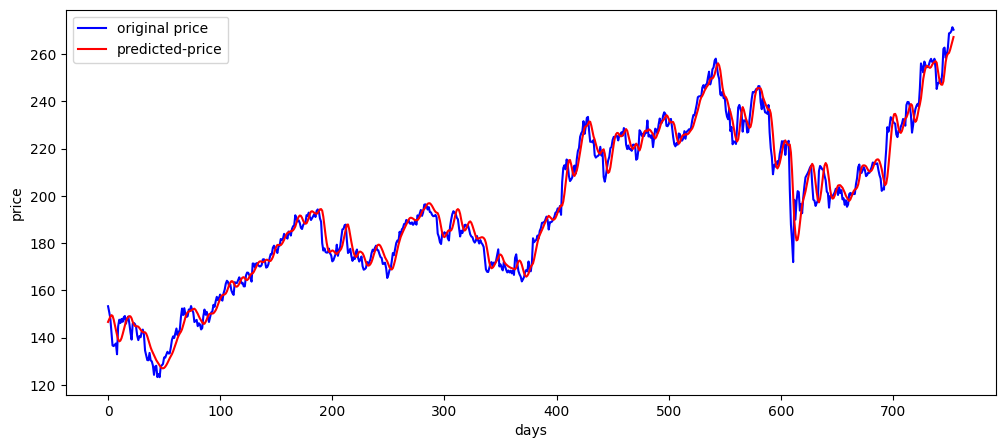

In [81]:
plt.figure(figsize=(12,5))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predict,'r',label='predicted-price')
plt.legend()
plt.xlabel('days')
plt.ylabel('price')

(180.0, 240.0)

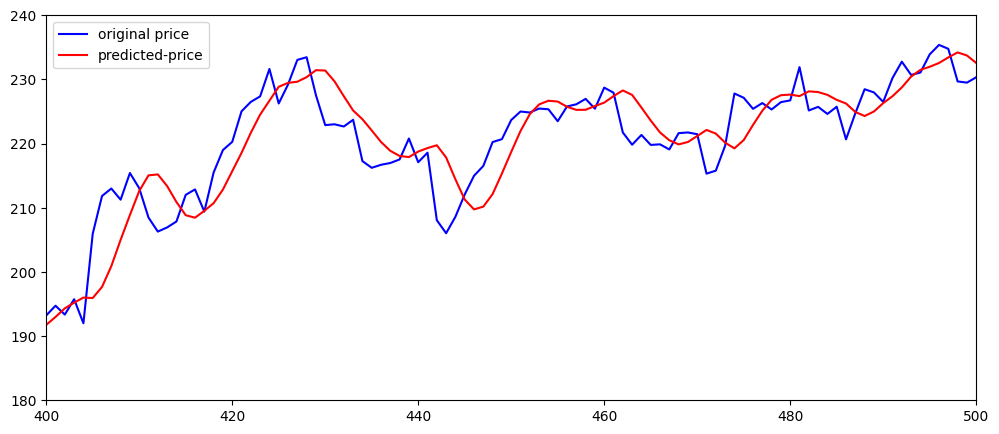

In [83]:
plt.figure(figsize=(12,5))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predict,'r',label='predicted-price')
plt.legend()
plt.xlim(400,500)
plt.ylim(180,240)

# Step 10 :  Model Evaluation

In [91]:
# mean squraed error

from sklearn.metrics  import mean_squared_error,r2_score



In [ ]:
mse = mean_squared_error(y_test , y_predict)
print('mean squraed error :', mse)

mean squraed erro : 27.590322867874747


In [ ]:
# root mean squread error


rmse = np.sqrt(mse)
print('root mean squread error :',rmse)

root mean squread error : 5.25264912857072


In [92]:
# r2 score  ( rsquarerd error)

r2 = r2_score(y_test,y_predict)
print(' r2 error is ', r2)

 r2 error is  0.9743358689955558
